Root Mean Squared Error (RMSE): 47861.7664647712


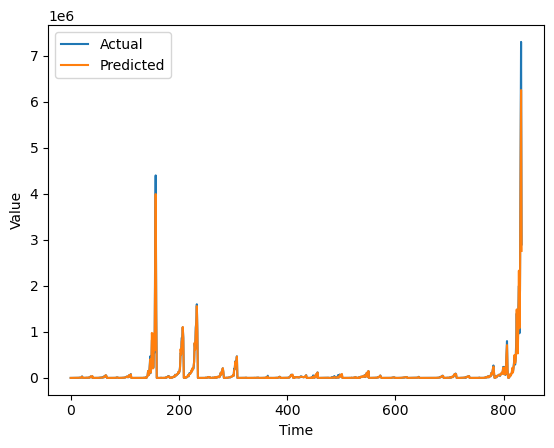

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('IEA-EV-dataEV_salesCarsHistorical.csv')
data = df.drop(['category', 'parameter', 'mode', 'unit'], axis=1)

# Convert the 'value' column to a more usable log.
data['log_value'] = data['value'].apply(lambda x: np.log(x))
df = data

encoded_data = pd.get_dummies(data, columns=['region', 'powertrain'])
x = encoded_data.drop(['log_value', 'value'], axis=1)
y = encoded_data[['log_value']]

# Create and fit the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(x, y)

# Make predictions on training data
train_prediction = model.predict(x)

# Convert back to usable values from log_values using exp
train_prediction = np.exp(train_prediction).astype(int)

# Calculate RMSE
error_score = np.sqrt(mean_squared_error(data['value'], train_prediction))
print("Root Mean Squared Error (RMSE):", error_score)

# Plot actual vs predicted values
plt.plot(data.index, data['value'], label='Actual')
plt.plot(data.index, train_prediction, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


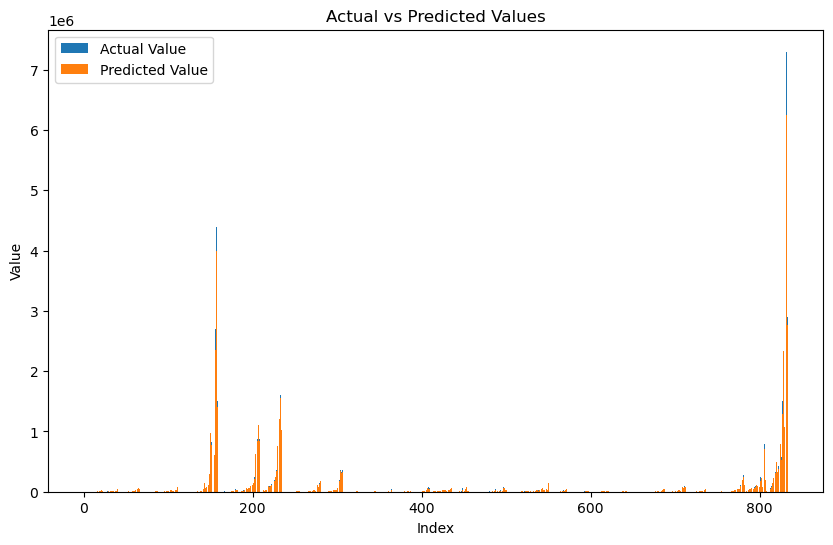

In [15]:
# Plotting the training error
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['value'], label='Actual Value')
plt.bar(data.index, train_prediction, label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
future_data=pd.DataFrame({'year': [2023,2024,2025],
             'region': ['India','India','India'],
             'powertrain': ['BEV','BEV','BEV']})
future_data
# Perform one-hot encoding on the future data using the original encoder
encoded_future_data = pd.get_dummies(future_data, columns=['region', 'powertrain'])

encoded_future_data = encoded_future_data.reindex(columns=encoded_data.columns[:], fill_value=0)
encoded_future_data
# Remove the 'value' column from the encoded future data
encoded_future_data = encoded_future_data.drop(['value','log_value'], axis=1)
# Predict the values for future years
future_prediction = model.predict(encoded_future_data)
future_prediction
# Create DataFrame of predicted values
future_prediction = pd.DataFrame(future_prediction, columns=['log_values'])
# Converting back to usable values from log_values using exp
future_prediction['value'] = future_prediction['log_values'].apply(lambda x: np.exp(x))
future_prediction['year'] = future_data['year']
future_prediction = future_prediction[['year', 'value']]
future_prediction

,year,value
0,2023,28102.671411
1,2024,28102.671411
2,2025,28102.671411
